In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline
from scipy.stats import loguniform
#import statsmodels.api as sm
#import statsmodels.formula.api as smf


In [2]:
datos = pd.read_csv(filepath_or_buffer = "/Users/ninoj/Downloads/beisbol.csv")

In [3]:
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [4]:
print(datos.describe())

       Unnamed: 0       bateos        runs
count   30.000000    30.000000   30.000000
mean    14.500000  5523.500000  693.600000
std      8.803408    79.873067   82.479088
min      0.000000  5417.000000  556.000000
25%      7.250000  5448.250000  629.000000
50%     14.500000  5515.500000  705.500000
75%     21.750000  5575.000000  734.000000
max     29.000000  5710.000000  875.000000


In [6]:
datos.shape

(30, 4)

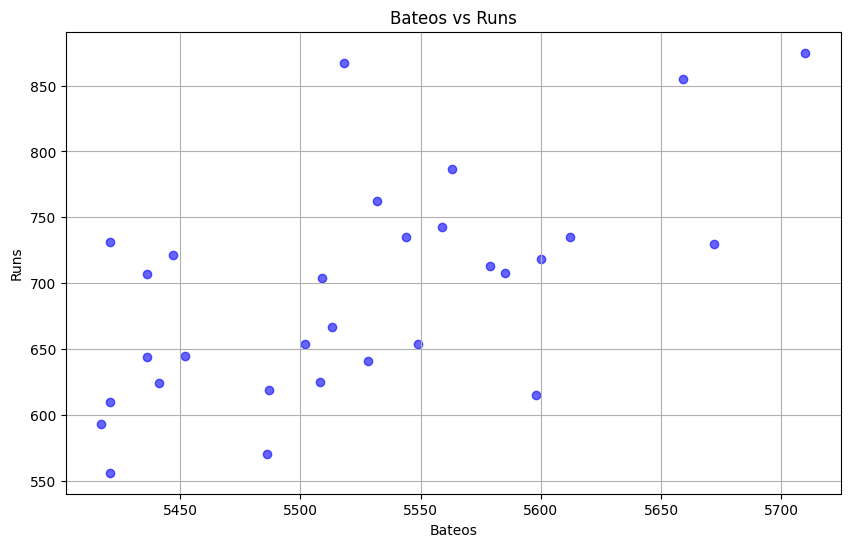

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(datos['bateos'], datos['runs'], color='blue', alpha=0.6)
plt.title('Bateos vs Runs')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.grid(True)
plt.show()

In [9]:
# Definición de las variables predictoras (X) y la variable objetivo (y)
X = datos['bateos'].values.reshape(-1, 1)
y = datos['runs'].values.reshape(-1, 1)

In [10]:
X

array([[5659],
       [5710],
       [5563],
       [5672],
       [5532],
       [5600],
       [5518],
       [5447],
       [5544],
       [5598],
       [5585],
       [5436],
       [5549],
       [5612],
       [5513],
       [5579],
       [5502],
       [5509],
       [5421],
       [5559],
       [5487],
       [5508],
       [5421],
       [5452],
       [5436],
       [5528],
       [5441],
       [5486],
       [5417],
       [5421]])

In [11]:
y

array([[855],
       [875],
       [787],
       [730],
       [762],
       [718],
       [867],
       [721],
       [735],
       [615],
       [708],
       [644],
       [654],
       [735],
       [667],
       [713],
       [654],
       [704],
       [731],
       [743],
       [619],
       [625],
       [610],
       [645],
       [707],
       [641],
       [624],
       [570],
       [593],
       [556]])

In [12]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Instanciar el modelo de regresión lineal
regressor = LinearRegression()

In [14]:
# Entrenar el modelo original
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predicciones con el modelo original
y_pred = regressor.predict(X_test)

In [16]:
# Evaluación del modelo original
print('--- Modelo Original ---')
print('Intercepto:', regressor.intercept_)
print('Coeficiente:', regressor.coef_)
print('Error Absoluto Medio (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coeficiente de Determinación (R²):', regressor.score(X_test, y_test))

--- Modelo Original ---
Intercepto: [-2837.77687486]
Coeficiente: [[0.63897479]]
Error Absoluto Medio (MAE): 37.158589869587935
Error Cuadrático Medio (MSE): 1976.597374864583
Raíz del Error Cuadrático Medio (RMSE): 44.4589403254799
Coeficiente de Determinación (R²): 0.5399576825420558


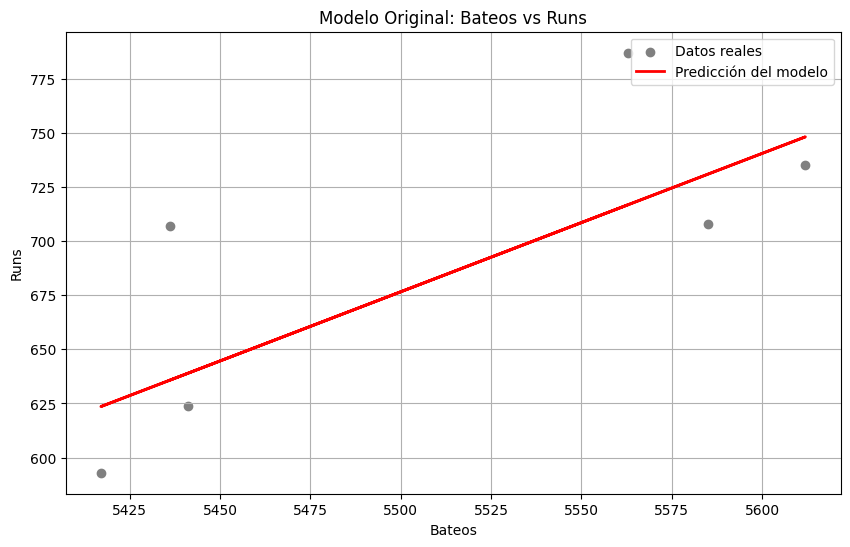

In [17]:
# Visualización del ajuste del modelo original
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción del modelo')
plt.title('Modelo Original: Bateos vs Runs')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
### OPTIMIZACIÓN 1: Búsqueda Aleatoria

# Definir la validación cruzada
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [19]:
# Espacio de búsqueda de hiperparámetros
parametros = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}


In [20]:
# Búsqueda aleatoria de hiperparámetros
search = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=parametros,
    n_iter=8,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    random_state=1
)

In [21]:
# Ejecutar la búsqueda
resultado = search.fit(X, y)

In [22]:
# Mostrar resultados
print('--- Optimización con RandomizedSearchCV ---')
print('Mejor puntuación:', resultado.best_score_)
print('Mejores Hiperparámetros:', resultado.best_params_)

--- Optimización con RandomizedSearchCV ---
Mejor puntuación: -54.90077212237434
Mejores Hiperparámetros: {'positive': False, 'fit_intercept': True, 'copy_X': True}


In [23]:
# Reentrenar el modelo con los mejores hiperparámetros
regressor_random = LinearRegression(**resultado.best_params_)
regressor_random.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predicciones con el modelo optimizado
y_pred_random = regressor_random.predict(X_test)

In [25]:
# Evaluación del modelo optimizado
print('Error Absoluto Medio (Optimizado - Random):', metrics.mean_absolute_error(y_test, y_pred_random))
print('Coeficiente de Determinación (R² - Random):', regressor_random.score(X_test, y_test))

Error Absoluto Medio (Optimizado - Random): 37.158589869587935
Coeficiente de Determinación (R² - Random): 0.5399576825420558


In [26]:
### OPTIMIZACIÓN 2: Búsqueda por Cuadrícula
# Búsqueda por cuadrícula
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=parametros,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv
)

In [27]:
# Ejecutar la búsqueda
resultado_grid = grid_search.fit(X, y)

In [28]:
# Mostrar resultados
print('--- Optimización con GridSearchCV ---')
print('Mejor puntuación (MAE):', resultado_grid.best_score_)
print('Mejores Hiperparámetros:', resultado_grid.best_params_)


--- Optimización con GridSearchCV ---
Mejor puntuación (MAE): -54.90077212237434
Mejores Hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [29]:
# Reentrenar el modelo final con los mejores hiperparámetros de GridSearchCV
regressor_grid = LinearRegression(**resultado_grid.best_params_)
regressor_grid.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predicciones con el modelo final
y_pred_grid = regressor_grid.predict(X_test)

In [31]:
# Evaluación del modelo optimizado con GridSearchCV
print('Error Absoluto Medio (Optimizado - Grid):', metrics.mean_absolute_error(y_test, y_pred_grid))
print('Coeficiente de Determinación (R² - Grid):', regressor_grid.score(X_test, y_test))

Error Absoluto Medio (Optimizado - Grid): 37.158589869587935
Coeficiente de Determinación (R² - Grid): 0.5399576825420558


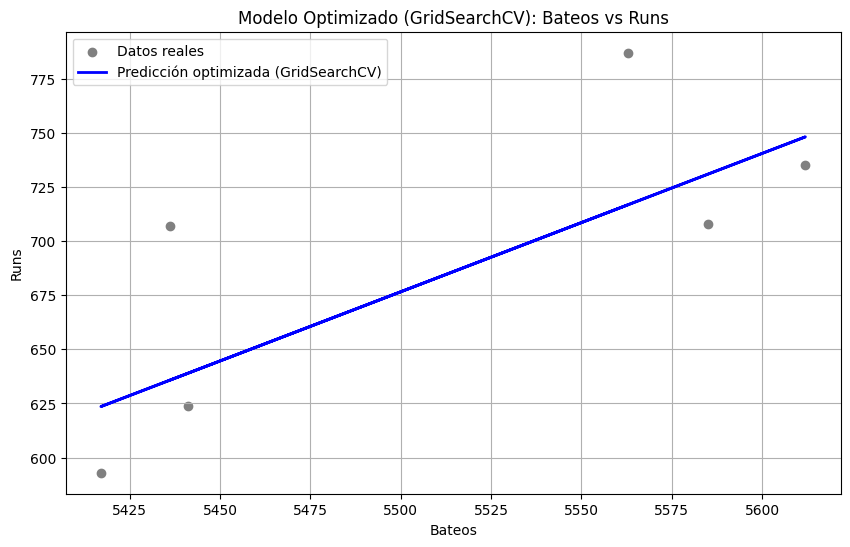

In [32]:
# Visualización del ajuste del modelo optimizado (GridSearchCV)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', label='Datos reales')
plt.plot(X_test, y_pred_grid, color='blue', linewidth=2, label='Predicción optimizada (GridSearchCV)')
plt.title('Modelo Optimizado (GridSearchCV): Bateos vs Runs')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()